In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [26]:
# The input file is read and it is splitted into X and Y:

train_data = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_data  = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
Y = train_data["SalePrice"]
X = train_data.drop("SalePrice", axis=1)
#print (train_data.iloc[:,6])

In [27]:
# All the columns with a greater percentage than desired of NaNs are dropped since they will not generalise well:

percentageMissingValuesPerColumn = (len(X)-X.count())/len(X)*100
maxPercentageDesired = 0.05 # 5%
falseTrueColumns = percentageMissingValuesPerColumn>maxPercentageDesired
columnIndexesToBeDropped = [0]
for i in range (X.shape[1]):
    if (falseTrueColumns[i]): # True means that column has more percentage of NaNs than desired
        columnIndexesToBeDropped.append(i)
X_clean = X.drop(X.columns[columnIndexesToBeDropped], axis=1)
test_data_clean = test_data.drop(test_data.columns[columnIndexesToBeDropped], axis=1)
allData = pd.concat([X_clean, test_data_clean])
#print (allData[1460:1461]==test_data_clean[:1])

allData_clean = np.array(pd.get_dummies(allData).values)

#There are 3 rows in the test data with NaN that will be replaced by the column means of the training Data
mean = np.mean (X_clean)
for x in range (allData_clean.shape[0]):
    for y in range (allData_clean.shape[1]):
        if (np.isnan(allData_clean[x][y])):
            allData_clean[x][y] = mean[y]


X_clean = allData_clean[:1460]
test_data_clean = allData_clean[1460:]

print (train_data.shape)
print (X_clean.shape)
print (test_data_clean.shape)


(1460, 81)
(1460, 215)
(1459, 215)


In [108]:
# Split the X_clean data into train and validation sets. There are 1460 examples so 1200 / 260 seems reasonable:
random_list = np.random.permutation(1460)
cuttingNumber = 1100

X_clean = np.array(X_clean)
X_train = X_clean [random_list[:cuttingNumber]]
Y_train = Y       [random_list[:cuttingNumber]]
X_val   = X_clean [random_list[cuttingNumber:]]
Y_val   = Y       [random_list[cuttingNumber:]]
test_data_clean = np.array(test_data_clean)
#print (test_data_clean[:,0])

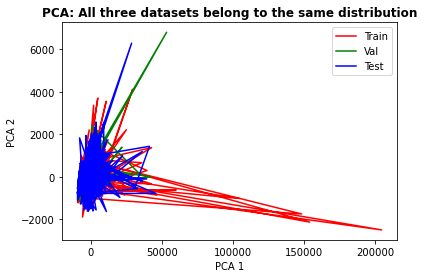

In [115]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA (n_components=2)
pca.fit(X_train)
trainPoints = pca.transform(X_train)
plt.plot(trainPoints[:,0], trainPoints[:,1], c="red")
valPoints = pca.transform(X_val)
plt.plot(valPoints[:,0], valPoints[:,1], c="green")
testPoints = pca.transform (test_data_clean)
plt.plot(testPoints[:,0], testPoints[:,1], c="blue")
plt.title ("PCA: All three datasets belong to the same distribution", fontweight="bold")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(["Training Points","Validation Points","Test Points"])
plt.show()

In [78]:
import tensorflow as tf
def rmsle_error(y_true, y_pred): 
    return tf.math.sqrt(keras.losses.MSLE(y_true, y_pred))

In [80]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=150, activation = "relu", input_shape = [215,], kernel_initializer = keras.initializers.GlorotNormal()))
model.add(keras.layers.Dense(units=60, activation = "relu", kernel_initializer = keras.initializers.GlorotNormal()))
model.add(keras.layers.Dense(units=25, activation = "relu", kernel_initializer = keras.initializers.GlorotNormal()))
model.add(keras.layers.Dense(units=5, activation = "relu", kernel_initializer = keras.initializers.GlorotNormal()))
model.add(keras.layers.Dense(units=1,  activation = "relu", kernel_initializer = keras.initializers.GlorotNormal()))
model.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss = rmsle_error)
model.fit (X_train, Y_train, batch_size=32, epochs = 60, verbose=1, validation_data = (X_val,Y_val))
print (model.evaluate(X_val, Y_val))

Train on 1100 samples, validate on 360 samples
Epoch 1/60
1100/1100 [==============================] - 1s 489us/sample - loss: 5.8609 - val_loss: 4.0165
Epoch 2/60
1100/1100 [==============================] - 0s 84us/sample - loss: 3.1943 - val_loss: 2.4186
Epoch 3/60
1100/1100 [==============================] - 0s 82us/sample - loss: 1.7833 - val_loss: 1.1807
Epoch 4/60
1100/1100 [==============================] - 0s 83us/sample - loss: 0.7154 - val_loss: 0.3372
Epoch 5/60
1100/1100 [==============================] - 0s 83us/sample - loss: 0.2681 - val_loss: 0.2500
Epoch 6/60
1100/1100 [==============================] - 0s 81us/sample - loss: 0.2531 - val_loss: 0.2443
Epoch 7/60
1100/1100 [==============================] - 0s 82us/sample - loss: 0.2488 - val_loss: 0.2406
Epoch 8/60
1100/1100 [==============================] - 0s 99us/sample - loss: 0.2447 - val_loss: 0.2363
Epoch 9/60
1100/1100 [==============================] - 0s 84us/sample - loss: 0.2404 - val_loss: 0.2319
Epoch 1

In [ ]:
predictions = np.squeeze(model.predict(test_data_clean), axis=1)
print (predictions)
output = pd.DataFrame({'Id':test_data.Id,'SalePrice':predictions})
output.to_csv("my_submission.csv", index=False)
print ("Your submission was succesfully saved!")